### Rappel

(dans le cas d'une utilisation sur votre poste personnel) Avant de commencer, assurez-vous d’avoir Scikit-learn installé (de préférence dans un environnement virtuel en utilisant conda) : pip install scikit-learn

sinon, à l'insa :

 ``$ source /opt/venv/stpi-m8/bin/activate ``

 ``$ python -m ipykernel install --user --name M8``

 ``$ jupyter notebook``

Nous utilisons un notebook Python. Cet outil est intéressant pour prototyper rapidement du code mais peut s'avérer difficile (car les cellules peuvent être lancées dans un ordre arbitraire et provoquer des effets de bord)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, silhouette_samples


# Clustering Hiérarchique Ascendante (CHA) de données synthétiques 

## génération de données synthétiques

- générer (avec scikit-learn) un jeu de données de $150$ points (en 2D) répartis en $4$ clusters et avec écart-type de $1.$ (on fixera le générateur pseudo-aléatoire à l'état $42$).
- afficher le jeu de données généré.


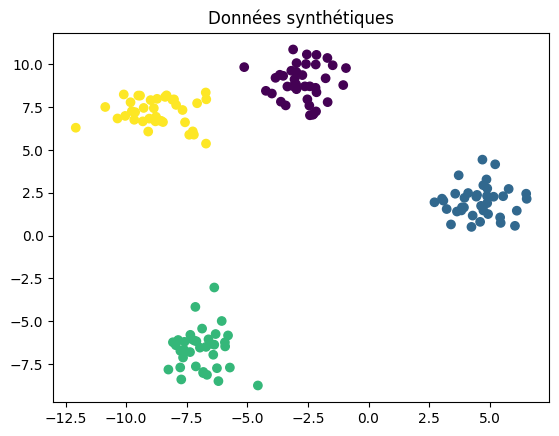

In [11]:
X, y_true = make_blobs(n_samples=150, centers=4, cluster_std=1, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis')
plt.title("Données synthétiques")
plt.show()

## Construction du dendrogramme

On applique l’algorithme CHA via la fonction `linkage()` avec la méthode de Ward.
Le dendrogramme représente les fusions successives entre groupes, et leurs distances.

- appliquer CHA avec la méthode de Ward et afficher le dendogramme


### Bonus

- recommencer avec une autre méthode d'agglomération et une autre distance
- changer les paramètres de la génération de données pour voir l'impact sur le dendogramme

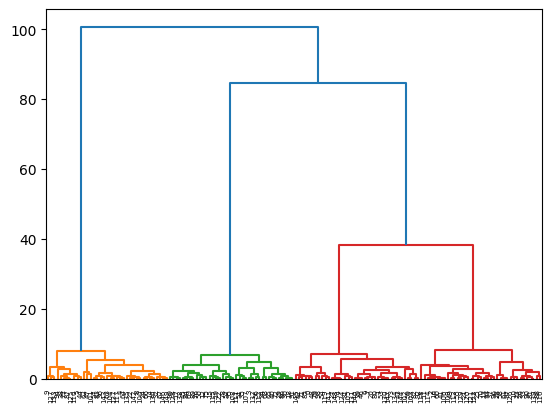

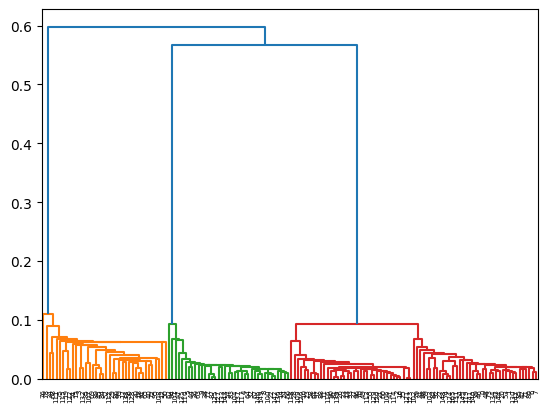

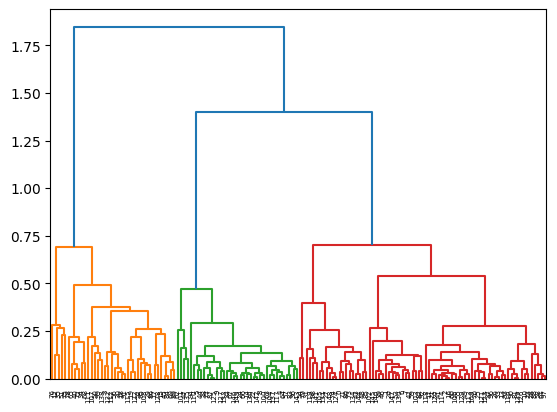

In [22]:
link = linkage(X, method='ward')
dendrogram(link)
plt.show()


# autre méthode
link2 = linkage(X, method = 'single', metric = 'braycurtis')
dendrogram(link2)
plt.show()


link3 = linkage(X, method = 'weighted', metric = 'canberra')
dendrogram(link3)
plt.show()



## Application du clustering

On applique CHA avec scikit-learn en fixant $k = 4$ (``AgglomerativeClustering``) et avec la méthode de Ward.  
Chaque point reçoit une étiquette de cluster, ce que l'on visualise ensuite.

- Créer un objet ``AgglomerativeClustering`` en précisant le nombre de cluster voulu et visualiser les clusters sur le jeu de données.


### Bonus

- recommencer avec une autre méthode d'agglomération et une autre distance
- changer les paramètres de la génération de données pour voir l'impact sur le dendogramme



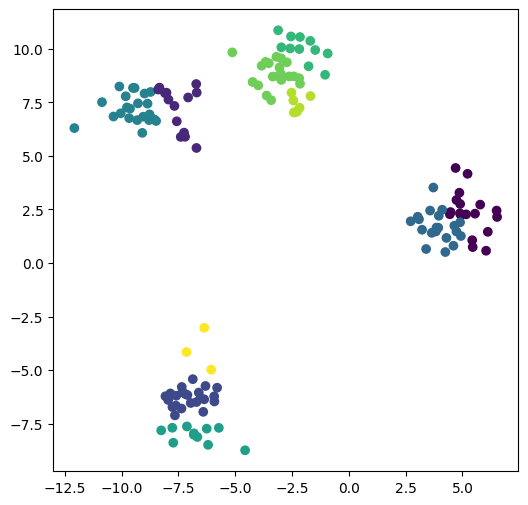

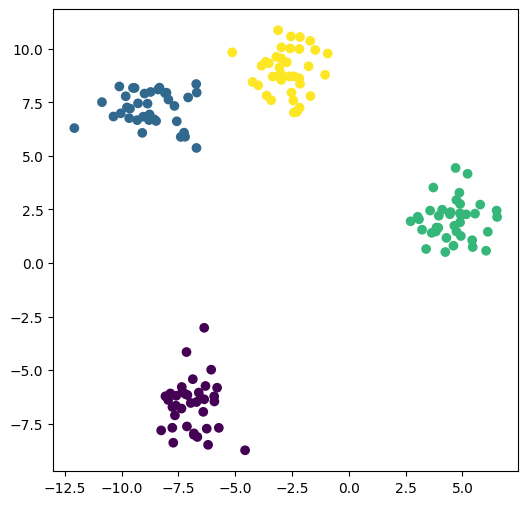

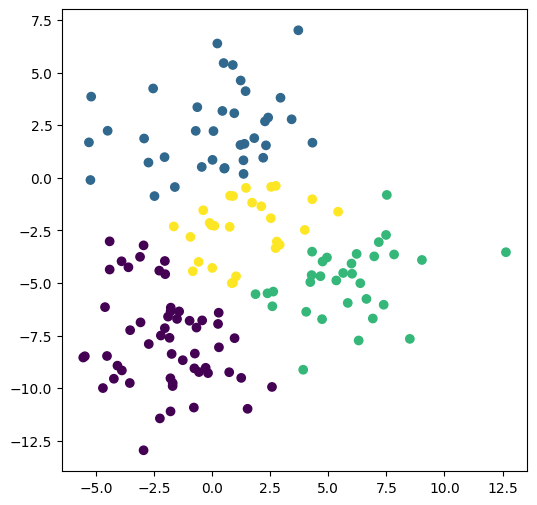

In [37]:
clustering = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels = clustering.fit_predict(X)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.show()


#autre methode d'agglomeration
cluster2 = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels2 = cluster2.fit_predict(X)

plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels2, cmap='viridis')
plt.show()

#modification des paramètres de generation de données
X_new, y_new = make_blobs(n_samples=150, centers=4, cluster_std=2.0, random_state=40)
cluster_new = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_new = cluster_new.fit_predict(X_new)

plt.figure(figsize=(6, 6))
plt.scatter(X_new[:, 0], X_new[:, 1], c=labels_new, cmap='viridis')
plt.show()



## Coefficient de silhouette : qualité du clustering

Pour chaque observation, on mesure à quel point elle est bien insérée dans son cluster.

- $a(i)$ : distance moyenne au sein de son propre cluster
- $b(i)$ : distance moyenne au cluster voisin le plus proche

On trace le graphique des silhouettes.

### Bonus

- recommencer avec une autre méthode d'agglomération et une autre distance
- changer les paramètres de la génération de données pour voir l'impact sur le score de silhouette



Score moyen de silhouette : 0.369


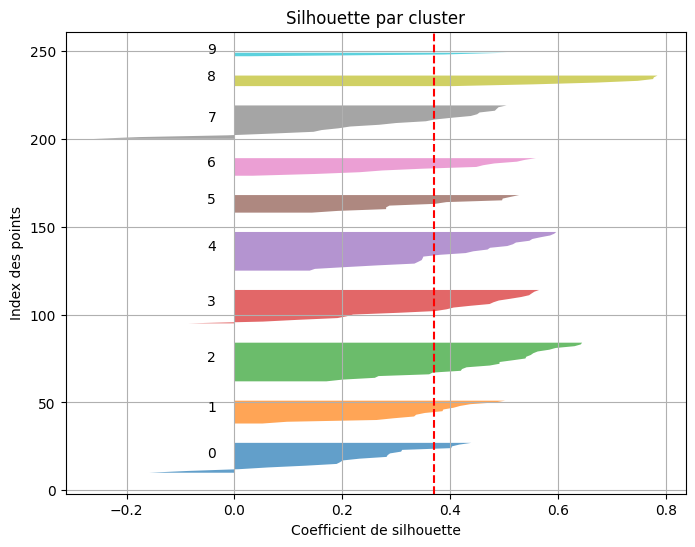

In [32]:
silhouette_avg = silhouette_score(X, labels)
sample_silhouette_values = silhouette_samples(X, labels)
print(f"Score moyen de silhouette : {silhouette_avg:.3f}")

plt.figure(figsize=(8, 6))
y_lower = 10

for i in range(10):
    ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.xlabel("Coefficient de silhouette")
plt.ylabel("Index des points")
plt.title("Silhouette par cluster")
plt.grid(True)
plt.show()


## Explorer plusieurs valeurs de k

On fait varier le nombre de clusters entre 2 et 6.  
Pour chaque valeur, on calcule le score moyen de silhouette.

Le but est de déterminer le k optimal.

- calculer le score moyen de silhouette pour une ACH avec un nombre de clusters variables
- afficher l'évolution du score en fonction du nombre de cluster (et en déduire un nombre de cluster optimal)


### bonus
- changer la méthode d'agglomeration ou les paramètres de génération des données pour voir l'impact sur le score.


In [38]:
silhouette_score=[]
n_cluster = [2,3,4,5,6]
for i in n_cluster:
    cluster = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_labels = cluster.fit_predict(X)
    
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)
    
    print(f"Pour n_clusters = {i}, score moyen de silhouette = {score:.3f}")
    
plt.figure(figsize=(8, 6))
plt.plot(n_cluster, silhouette_scores, 'bo-')
plt.show()


TypeError: 'list' object is not callable